# Countries In Need
### Clustering Countries by Socio-economic and Health Factors

What we hope to answer in this notebook is finding the countries in need of the most aid based on socioeconomic and health factors.  To do this we will be using K-means clustering and Hierachical clusting (unsupervised machine learning) to group the countries based on an array of variables.  For the best result we will first do PCA (Principle Component Analysis) to reduce dimensionality as this will help with noise reduction from less important variables.  Then we will train the models and visualize the groupings.

### Full 

## Load Data

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import glob as glob

In [369]:
# Load necessary Data
data_dict = pd.read_csv('data/data-dictionary.csv')
country_data = pd.read_csv('data/Country-data.csv')

## Show Data

In [370]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [371]:
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services. Given as %age o...
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age o...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [372]:
# Must exempt the country row as model only takes numeric data.
data = country_data.drop(columns='country')
countries = country_data['country']

# Principle Component Analysis (PCA)
This is the initial PCA from the data before clustering.  
No clear clusters but it is interesting to see how as x-axis grows so doe the variance.

This is also shown with the very low Pearson Correlation.

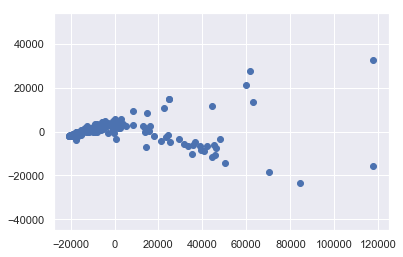

8.222407585549877e-17


In [373]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(data)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.savefig('pca_initial')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

## a) Number of Principal Components
To get the number of principal components to use we will look at the varience by number of features.
In this case we see that after 0 features there is a small gradual decline in varience.  For the sake of this analysis, we will just eyeball graph to choose a good number of principal components. 

In [374]:
# Standardize Data Type
data['income'] = data['income'].astype(float)
data['gdpp'] = data['gdpp'].astype(float)

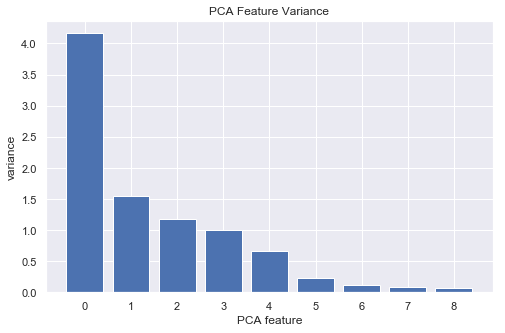

In [375]:
'''Variance of PCA Features'''
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(data)

# Plot the explained variances
features = range(pca.n_components_)
plt.figure(figsize=(8,5))
plt.bar(features, pca.explained_variance_)
plt.title('PCA Feature Variance')
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.savefig('PCA_feature_variance_k_means')
plt.show()

## b) Reduce Dimensionality

In [376]:
'''Get Top 2 Components PCA'''
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(data)

# Transform the scaled samples: pca_features
pca_features = pca.transform(data)

# Print the shape of pca_features
print(pca_features.shape)

(167, 2)


# K-Means
Using the pca features we will cluster the data using K-Means.

## a) Knee/Elbow Method

This is the method used to select the optimal number of clusters for K-means.

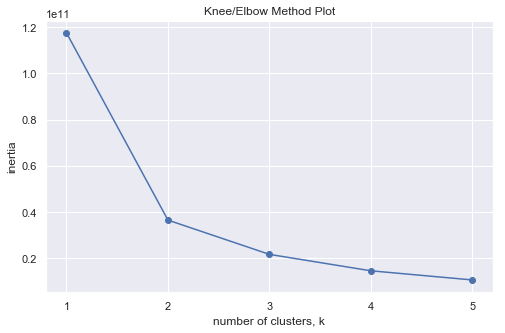

In [377]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(pca_features)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(8,5))
plt.plot(ks, inertias, '-o')
plt.title('Knee/Elbow Method Plot')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.savefig('knee_elbow')
plt.show()

## b) Plot Clustering

In [378]:
'''KMeans Clustering: Predict Cluster'''
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(pca_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [379]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(pca_features)
labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### n_clusters = 3

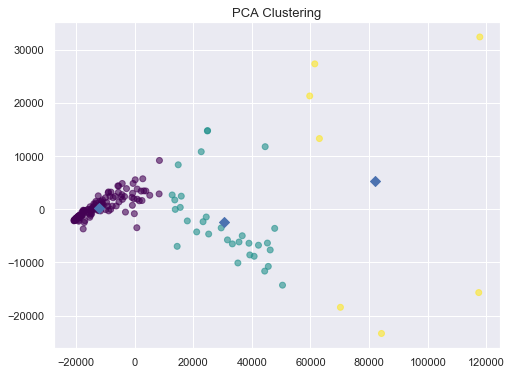

In [380]:
'''Plot Clusters'''
# Assign the columns of new_points: xs and ys
xs = pca_features[:,0]
ys = pca_features[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.figure(figsize=(8,6))
plt.scatter(xs,ys, c=labels, alpha=0.6, cmap='viridis')

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.title('PCA Clustering', size=13)
plt.savefig('pca_k_means_3')
plt.show()

### n_clusters = 5

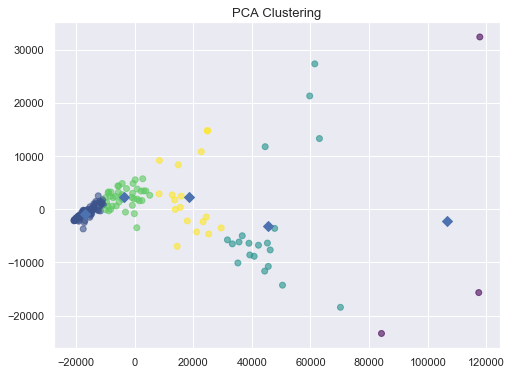

In [408]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=5)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(pca_features)

# Assign the columns of new_points: xs and ys
xs = pca_features[:,0]
ys = pca_features[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.figure(figsize=(8,6))
plt.scatter(xs,ys, c=labels, alpha=0.6, cmap='viridis')

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.title('PCA Clustering', size=13)
plt.savefig('pca_k_means_5')
plt.show()

### Bonus: Building Interactive PCA Plot

In [455]:
pca_feature_df = pd.DataFrame(pca_features)
pca_feature_df.columns = ['x','y']

pca_feature_df['labels'] = labels
pca_feature_df['countries'] = countries

In [456]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.plotting import ColumnDataSource
from bokeh.models import CategoricalColorMapper
from bokeh.models import HoverTool

#Create ColumnDataSource from data
source0 = ColumnDataSource(pca_feature_df[pca_feature_df.labels == 0])
source1 = ColumnDataSource(pca_feature_df[pca_feature_df.labels == 1])
source2 = ColumnDataSource(pca_feature_df[pca_feature_df.labels == 2])
source3 = ColumnDataSource(pca_feature_df[pca_feature_df.labels == 3])
source4 = ColumnDataSource(pca_feature_df[pca_feature_df.labels == 4])

#Figure
p = figure(x_axis_label='', y_axis_label='', title='PCA Clustering (K-Means) w/ Hover Annotations')

#Plot by Cluster
p.circle('x','y', source=source0, color='red', size=10, alpha=0.5)
p.circle('x','y', source=source1, color='orange', size=10, alpha=0.5)
p.circle('x','y', source=source2, color='yellow', size=10, alpha=0.5)
p.circle('x','y', source=source3, color='green', size=10, alpha=0.5)
p.circle('x','y', source=source4, color='blue', size=10, alpha=0.5)

# Create a HoverTool object: hover
hover = HoverTool(tooltips=[('Country','@countries')])

# Add the HoverTool object to figure p
p.add_tools(hover)

output_file('pca_kmeans.html')
show(p)

## c) Resulting Clusters

In [391]:
# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(pca_features)

# Create a DataFrame with labels and varieties as columns: df
df_kmeans = pd.DataFrame({'labels': labels, 'varieties': countries})

In [392]:
# Format with pca featues
kmeans_full_df = df_kmeans.merge(pd.DataFrame(pca_features), left_index=True, right_index=True)
kmeans_full_df.columns = ['cluster_id', 'countries','pca_1','pca_2']

kmeans_full_df = kmeans_full_df.sort_values(['pca_1','pca_2'])

### Lowest Cluster Countries (Light Green)

In [396]:
df_kmeans[df_kmeans.labels == 0].varieties.values

array(['Afghanistan', 'Albania', 'Angola', 'Armenia', 'Bangladesh',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde',
       'Central African Republic', 'Chad', 'China', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Ecuador',
       'Egypt', 'El Salvador', 'Eritrea', 'Fiji', 'Gambia', 'Georgia',
       'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'India', 'Indonesia', 'Jamaica', 'Jordan', 'Kenya', 'Kiribati',
       'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Moldova',
       'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Niger', 'Nigeria', 'Pakistan', 'Paraguay', 'Peru', 'Philippines',
       'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'Sri Lanka', 'St. Vincent and the Grenadines', 'Sudan',
       'T

### Second Lowest Cluster Countries (Purple

In [395]:
df_kmeans[df_kmeans.labels == 3].varieties.values

array(['Algeria', 'Antigua and Barbuda', 'Argentina', 'Azerbaijan',
       'Barbados', 'Belarus', 'Botswana', 'Brazil', 'Bulgaria', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic',
       'Estonia', 'Gabon', 'Grenada', 'Hungary', 'Iran', 'Iraq',
       'Kazakhstan', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Montenegro', 'Panama', 'Poland', 'Romania', 'Russia', 'Serbia',
       'Seychelles', 'Slovak Republic', 'South Africa', 'Suriname',
       'Thailand', 'Turkey', 'Uruguay', 'Venezuela'], dtype=object)

### Middle Cluster Countries (Yellow)

In [399]:
df_kmeans[df_kmeans.labels == 1].varieties.values

array(['Bahamas', 'Bahrain', 'Cyprus', 'Czech Republic',
       'Equatorial Guinea', 'Greece', 'Israel', 'Italy', 'Malta',
       'New Zealand', 'Oman', 'Portugal', 'Saudi Arabia', 'Slovenia',
       'South Korea', 'Spain', 'United Kingdom'], dtype=object)

### Second Highest Cluster Countries (Blue)

In [397]:
df_kmeans[df_kmeans.labels == 2].varieties.values

array(['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Denmark',
       'Finland', 'France', 'Germany', 'Iceland', 'Ireland', 'Japan',
       'Kuwait', 'Netherlands', 'Singapore', 'Sweden', 'Switzerland',
       'United Arab Emirates', 'United States'], dtype=object)

### Upper Most Cluster Countries (Teal)

In [398]:
df_kmeans[df_kmeans.labels == 4].varieties.values

array(['Luxembourg', 'Norway', 'Qatar'], dtype=object)

# 2. Hierarchical Clustering: Agglomerative Clustering

## a) Plot Hierarchy

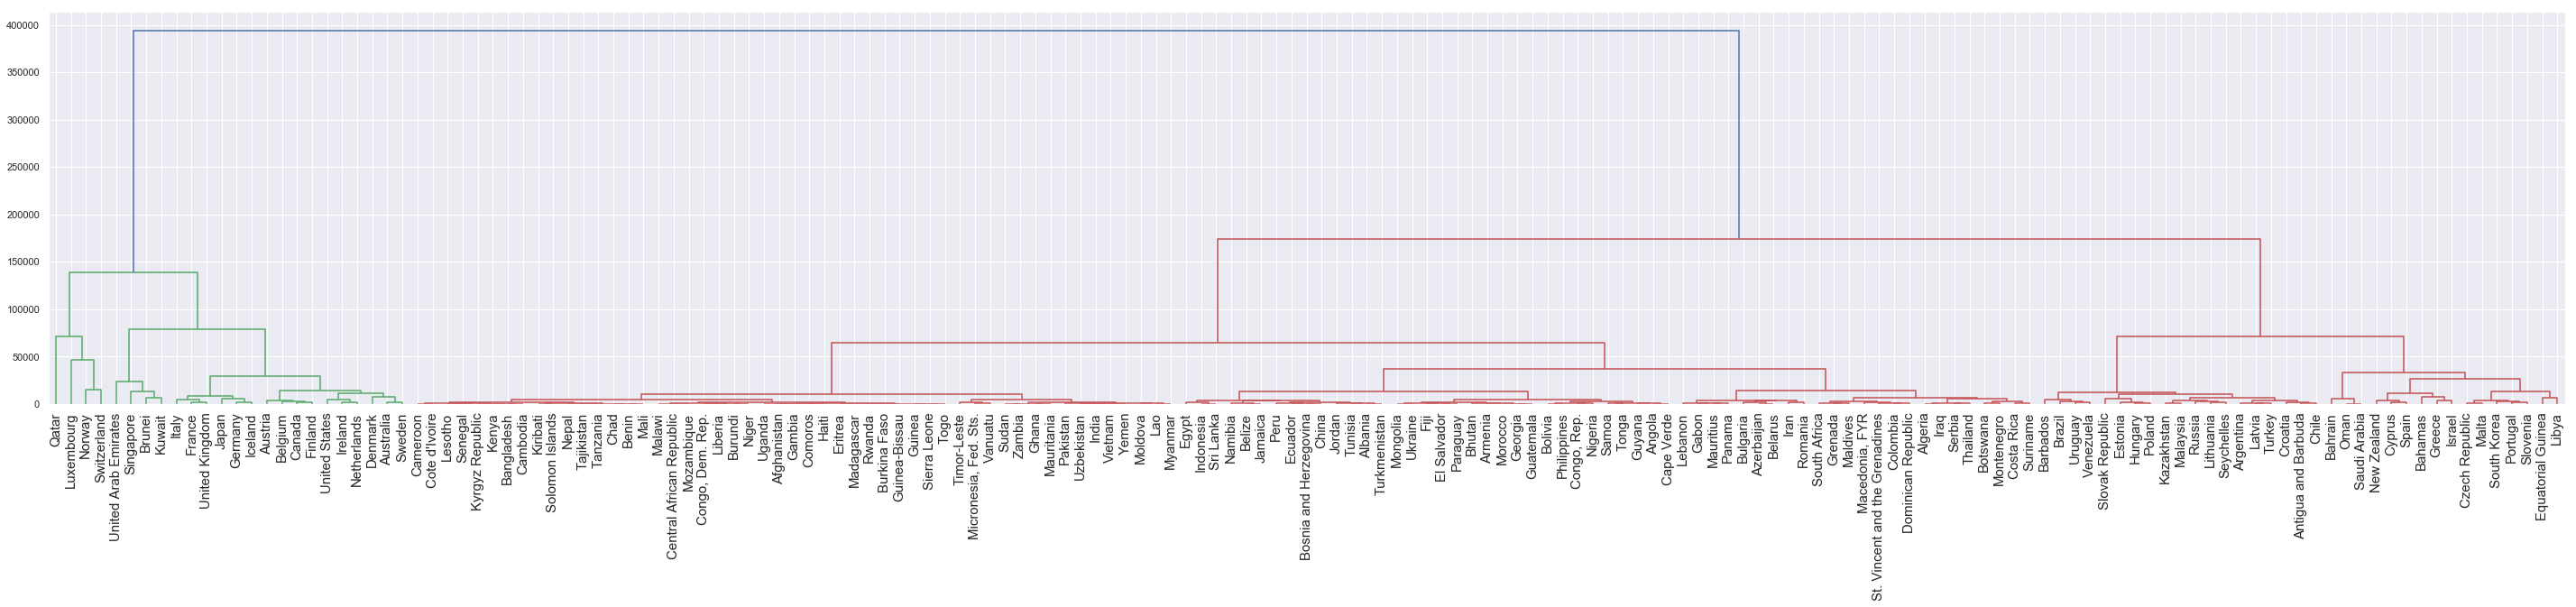

In [333]:
'''Plot Hierarchy Clustering'''
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(pca_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(50,8))
dendrogram(mergings, labels=countries.values, leaf_rotation=90, leaf_font_size=15)
plt.savefig('hierarchical_clustering')
plt.show()

## b) Get Clusters

In [403]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
labels_agg = cluster.fit_predict(pca_features) 
labels_agg

array([2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2])

In [404]:
# Create a DataFrame with labels and varieties as columns: df
df_agg = pd.DataFrame({'labels': labels_agg, 'varieties': countries})

## c) Plot Clusters

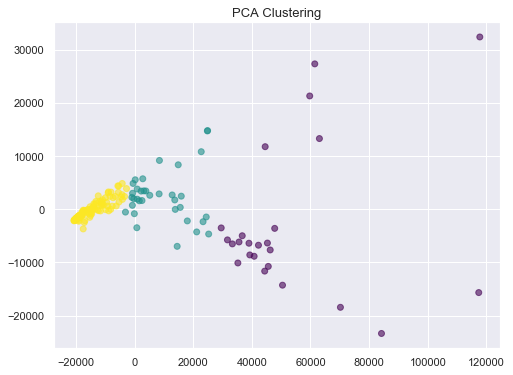

In [405]:
'''Plot Clusters'''
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = pca_features[:,0]
ys = pca_features[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.figure(figsize=(8,6))
plt.scatter(xs,ys, c=labels_agg, alpha=0.6, cmap='viridis')
plt.title('PCA Clustering', size=13)
plt.savefig('pca_agglormerative_clustering')
plt.show()

## d) Results

### Lower Cluster Countries (Yellow)

In [302]:
df_agg[df_agg.labels == 2].varieties.values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde',
       'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kenya',
       'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lebanon', 'Lesotho',
       'Liberia', 'Macedonia, FYR', 'Madagascar', 'Malawi', 'Maldives',
       'Mali', 'Mauritania', 'Mauritius', 'Micronesia, Fed. Sts.',
       'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique',
       'Myanmar'

### Middle Cluster Countries (Teal)

In [303]:
df_agg[df_agg.labels == 1].varieties.values

array(['Antigua and Barbuda', 'Argentina', 'Bahamas', 'Bahrain',
       'Barbados', 'Brazil', 'Chile', 'Croatia', 'Cyprus',
       'Czech Republic', 'Equatorial Guinea', 'Estonia', 'Greece',
       'Hungary', 'Israel', 'Kazakhstan', 'Latvia', 'Libya', 'Lithuania',
       'Malaysia', 'Malta', 'New Zealand', 'Oman', 'Poland', 'Portugal',
       'Russia', 'Saudi Arabia', 'Seychelles', 'Slovak Republic',
       'Slovenia', 'South Korea', 'Spain', 'Turkey', 'Uruguay',
       'Venezuela'], dtype=object)

### Upper Cluster Countries (Purple)

In [304]:
df_agg[df_agg.labels == 0].varieties.values

array(['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Denmark',
       'Finland', 'France', 'Germany', 'Iceland', 'Ireland', 'Italy',
       'Japan', 'Kuwait', 'Luxembourg', 'Netherlands', 'Norway', 'Qatar',
       'Singapore', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'], dtype=object)

# Comparing Results

There are some difference in the exactly clustering of the countries however the general clusters appear to be the same.  This may just be random as unclassified learning models have less reproducability.  The Hierarchical Clustering (Agglomerative) model does have a more even number of countries in each group with cluster centers being more closer to the left than in the case of the K-Means clustering model.  

There is however no right or wrong way to cluster and there is a clear consensus on the model.

# So Who Is In Need of The Most Aid???

In [314]:
# Merge Hierarchical Clustering with PCA values
hierarchical_w_pca = df_agg.merge(pd.DataFrame(pca_features), left_index=True, right_index=True)
hierarchical_w_pca.columns = ['cluster_label','country','pca_1','pca_2']

#Sort Values by PCA
sorted_countries = hierarchical_w_pca.sort_values(['pca_1','pca_2']).reset_index(drop=True)

### Countries by Need based on Socioeconomic and Health Features

In [321]:
# Reformat
country_rankings = sorted_countries[['country']].reset_index()
country_rankings.columns = ['Ranking','Country']
country_rankings['Ranking'] = country_rankings['Ranking'] + 1
country_rankings.to_csv('need_ranking')
country_rankings

,Ranking,Country
0,1,"Congo, Dem. Rep."
1,2,Burundi
2,3,Liberia
3,4,Niger
4,5,Central African Republic
5,6,Mozambique
6,7,Malawi
7,8,Sierra Leone
8,9,Togo
9,10,Madagascar
